In [79]:
from manim import *
import random
import matplotlib.pyplot as plt

config.media_width = "100%"

ri = "-s -qh --disable_caching -v WARNING Example"
rv = "-qh --disable_caching -v INFO Example"


<span style="font-size:50px;">THEODOROUS SPIRAL</span>

In [287]:
def theordorus(n):

    def norm(mob): #--> helper functions
        return 1/(np.linalg.norm(mob.get_vector()))
    def thi(n):
        sum_thi = 0
        for i in range(1, int(n) + 1): sum_thi += np.arctan(1/(np.sqrt(i)))
        return sum_thi

####################################################################################

    line=Line(ORIGIN,RIGHT)
    def triangles(n,l=line):  #---> given numbers of triangles with its hypertenouse
        # assert n>0 , 'Negative value or zero'
        adj=line
        hyp=adj.copy().set_angle(
            angle=thi(int(n)), about_point= adj.get_start()
            ).scale(norm(adj),about_point=adj.get_start())

        hyp.scale((int(n)+1)**0.5,about_point=adj.get_start())

        p0=adj.get_end()
        p1=hyp.get_end()

        opp=Line(p0,p1)

        # end0=Dot(p0,color=BLUE).scale(0.5)
        # end1=Dot(p1,color=RED)
        tri = Polygon(ORIGIN, p0, p1, fill_opacity=0.5)
        tr0=VGroup(hyp,tri)


        return tr0
########################################################################################


    #creating somewhat of recursion with base case of the unit triangle
    import itertools
    colors=itertools.cycle([PURPLE,PINK,RED,GREEN,BLUE,YELLOW,ORANGE,MAROON])
    base_tri=triangles(1)
    line=base_tri[0]
    vg=VGroup(base_tri)
    for i in range(2,int(n)):
        tri=triangles(i)
        vg.add(tri.set_color(next(colors)))
        line=tri[0]


    return vg


class Example(MovingCameraScene):
    def construct(self):
        t=ValueTracker(1)
        
        tr=always_redraw(lambda : theordorus(np.ceil(t.get_value())))
        
        self.play(Create(tr))
        
        self.play(t.animate.set_value(17),run_time=10)
        self.wait()
        self.play(LaggedStart(self.camera.frame.animate.scale(3),t.animate.set_value(200),lag_ratio=0.2),run_time=10)
        self.wait(3)

%manim $rv

Manim Community v0.18.1

Animation 1: _MethodAnimation(ValueTracker):  40%|###9      | 119/300 [00:01<00:02, 84.82it/s]

In [ ]:
from itertools import cycle

class TheodorousSpiral(VGroup):
    def __init__(self ,iter=3,**kwargs):
        super().__init__(**kwargs)
        self.main_points=[ORIGIN]
        self.vec=RIGHT
        self.colors=cycle([BLUE,TEAL,GREEN,YELLOW,GOLD,RED,MAROON,PURPLE,PINK,ORANGE])
        self.iter=iter
       
        self.level=0
       
        self.spiral(1,iter)


    def spiral(self,length,iter):
        if iter ==0:
            return
        if len(self.submobjects) == self.level:
            self.add(VGroup())
        self.level +=1
        new_len=np.sqrt((length)**2 +1)
        self.forward(length)
        self.left(90*DEGREES)
        self.forward(1)
        self.left(180*DEGREES - np.arctan(length))
        self.forward(new_len)
        self.left(180*DEGREES)
        self.spiral(length=new_len,iter=iter-1)

    def forward(self,Length):
        last_point=self.main_points[-1]
        self.main_points.append(last_point+self.vec*Length)
        vmob=VMobject(stroke_width=0.5,fill_opacity=0.5,color=next(self.colors))
        self.submobjects[self.level-1].add(vmob.set_points_as_corners(self.main_points))
    def left(self,_angle):
        self.vec=rotate_vector(vector=self.vec,angle=_angle)

In [ ]:
%%manim $rv
class Example(MovingCameraScene):
    def construct(self):
        theo=TheodorousSpiral(17)
        # self.add(theo)
        for i in range(len(theo)):
            theo[i].set_z_index(len(theo)-i)
        self.play(Create(theo[:17]),run_time=7)
        self.wait()
        self.play(Create(theo[17:]),self.camera.frame.animate.set(height=theo.height),run_time=7)
        self.wait()
       


        
        
        
      
       

Manim Community v0.18.1

<span style="font-size:50px;">TREES FRACTALS</span>

In [ ]:
class PythagorasTree(VGroup):
    def __init__(self,length=4,main_points=[ORIGIN],iterations=5,angle=30,**kwargs):
        super().__init__(**kwargs)
        self.main_points=main_points
        self.level=0
        self.vector= UP
        self.angle=angle
        self.draw_node(size=length,iter=iterations)


    def draw_square(self, size):
        sub_points = [self.main_points[-1]]
        vector     = self.vector.copy()

        for _ in range(4):
            sub_points.append(sub_points[-1] + vector * size)
            vector = rotate_vector(vector, 90*DEGREES)

        square = VMobject(
            stroke_width=DEFAULT_STROKE_WIDTH * 0.9 ** (self.level+1)
        ).set_points_as_corners(sub_points)
        self.submobjects[self.level-1].add(square)

    def draw_node(self, size, iter):
        if iter == 0:
            return
        if len(self.submobjects) == self.level:
            self.add(VGroup())
        self.level +=1
        self.draw_square(size)
        # Draw the left branch
        left_size = size * np.cos(self.angle * DEGREES)
        self.forward(size)
        self.left(90)
        self.forward(size)
        self.right(180 - self.angle)
        self.forward(left_size)
        self.left(90)
        self.draw_node(left_size, iter - 1)
        # Draw the right branch
        right_size = size * np.sin(self.angle * DEGREES)
        self.right(180)
        self.forward(right_size)
        self.left(90)
        self.draw_node(right_size, iter- 1)
        self.left(90 - self.angle)
        self.backward(size)
        self.level -=1

    def left(self, _angle):
        self.vector = rotate_vector(self.vector, _angle * DEGREES)

    def right(self, _angle):
        self.left(- _angle)

    def forward(self, length):
        last_point = self.main_points[-1]
        self.main_points.append( last_point + self.vector * length )
    
    def backward(self, length):
        self.forward(-length)

In [ ]:
%%manim $rv

class Example(MovingCameraScene):
    def construct(self):
        camera=self.camera.frame
        py=PythagorasTree(iterations=12)
        py.move_to(DOWN)
        camera.set(height=py[:2].height+5)
        camera.move_to(py[:2].get_center())
        py[:6].set(color=GRAY_BROWN)
        py[6:].set(color=GREEN)
      


     
    


        
        self.play(Create(py[:2],lag_ratio=1),run_time=3)

        
        for i in range(2,4):
            self.play(camera.animate.set(height=py[:i].height+5))
            self.play(Create(py[i]),run_time=0.5)

        self.play(camera.animate.set(height=py.height+10))
        for i in range(4,len(py)):
            self.play(Create(py[i],lag_ratio=0),run_time=0.3)
        self.wait()
        self.play(FadeOut(py))
       
    


        
     



Manim Community v0.18.1

In [ ]:
%%manim $rv
class Example(Scene):
    def construct(self):
        vt=ValueTracker(30)
        py=always_redraw(lambda : PythagorasTree( iterations=8 ,angle=int(np.ceil(vt.get_value()))))
       
        def fit(mob):
            mob.height=config.frame_height-1
            mob.shift(np.array([0,-3.8,0])-mob[0].get_critical_point(DL))
            mob[:5].set(color=GRAY_BROWN)
            mob[5:].set(color=GREEN)

        py.add_updater(fit)
        self.play(FadeIn(py))
        self.play(vt.animate.set_value(45),rate_func=there_and_back, run_time=5)
        self.wait()
        self.play(FadeOut(py))


Manim Community v0.18.1

In [ ]:
%%manim $rv
class Example(Scene):
    def construct(self):
        kwarg={'run_time': 1 , 'rate_func': linear}
        pyth=PythagorasTree(iterations=12,angle=45)
        pyth[:6].set(color=GRAY_BROWN)
        pyth[6:].set(color=GREEN)
        # pyth.set_color_by_gradient(GREEN,YELLOW)
        pyth.move_to(ORIGIN)
        pyth.height=config.frame_height-1
        for i in range(len(pyth)):
            self.play(Write(pyth[i],lag_ration=0),**kwarg)
        self.wait()
        self.play(FadeOut(pyth))

Manim Community v0.18.1

In [2]:
class TreeFractals(VGroup):
    def __init__(self,length=3,iterations=3,vector=UP,points_path=[ORIGIN],**kwargs):
        super().__init__(**kwargs)
        self.points_path=points_path
        self.vector=vector
        self.level=0
        self.tree(length,iterations=iterations)


    def tree(self, length, left=25, right=50, iterations=3):
        if iterations == 0:
            return
        # Create new level if level increases
        if len(self.submobjects) == self.level:
            self.add(VGroup())
        self.level +=1
        self.forward(length)
        self.right(left)
        self.tree(length*0.9, left, right, iterations-1)
        self.left(right)
        self.tree(length*0.9, left, right, iterations-1)
        self.right(left)
        self.backward(length)
        self.level -=1
    def forward(self, length, add_line=True):
        last_point = self.points_path[-1]
        self.points_path.append( last_point + self.vector * length )
        # add line to corresponding level
        if add_line:
            self.submobjects[self.level-1].add(
                Line(*self.points_path[-2:], stroke_width=DEFAULT_STROKE_WIDTH * 0.8**(self.level))
            )
    def backward(self, length):
        self.forward(-length, add_line=False) 

    def left(self, angle):
        self.vector = rotate_vector(self.vector, angle * DEGREES)

    def right(self, angle):
        self.left(-angle)

In [12]:
%%manim $rv
class Example(Scene):
    def construct(self):
        tree=TreeFractals(iterations=10)
        tree.height= config.frame_height-2
        tree.move_to(ORIGIN)
        img=ImageMobject('canopy.jpg')
        img.height=config.frame_height
        img.shift(LEFT*0.5+DOWN)
        img.fade(1)
        self.add(img)
        tree.shift(DOWN)
        self.play(Create(tree[0]))
        self.wait(0.5)
        self.play(Create(tree[1]))
        self.wait(0.5)
        self.play(Create(tree[2]))
        self.wait()

        
        for branch_level in tree[3:]:
            self.play(
                Create(branch_level, lag_ratio=0, run_time=0.5, rate_func=linear)
            )
        
        self.wait()
        self.play(img.animate.set_opacity(0.5))
        self.wait()
        

Manim Community v0.18.1

<span style="font-size:50px;">KOCH FRACTAL</span>

In [8]:
class KochFractal(VMobject):
    def __init__(self, start, end, random=False, order=1, **kwargs):
        start_line       = Line(start, end)
        self.random = random 
        self.points_path = [start_line.get_start()]
        self.vector      = start_line.get_unit_vector()
        self.koch(start_line.get_length(), order)
        super().__init__(**kwargs)

    def generate_points(self):
        self.set_points_as_corners(self.points_path)

    def koch(self, length, order):
        if order == 0:
            self.points_path.append( self.points_path[-1] + self.vector * length )
            return
        length /= 3
        if self.random:
            angle=np.random.normal(60, 25)
            self.koch(length, order-1)
            self.left(angle)
            self.koch(length, order-1)
            self.right(angle)
            self.koch(length, order-1)
            self.left(angle)
            self.koch(length, order-1)
        else:
            self.koch(length, order-1)
            self.left()
            self.koch(length, order-1)
            self.right()
            self.koch(length, order-1)
            self.left()
            self.koch(length, order-1)
        

    def left(self, angle=60):
        self.vector = rotate_vector(self.vector, angle * DEGREES)

    def right(self, angle=60):
        self.left(-2*angle)
    

In [13]:
%%manim $rv
class Example(MovingCameraScene):
    def construct(self):
        line=KochFractal(4*LEFT,4*RIGHT,order=7)
        line.height=config.frame_height-1
        self.play(Transform(line,KochFractal(line.get_start(),line.get_end(),order=0),**creation))
        self.wait()


Manim Community v0.18.1

In [3]:
creation= {'run_time': 1.5, 'rate_func': smooth}
simple_run={'run_time': 2, 'rate_func': smooth}
long_run={'run_time': 10, 'rate_func': linear}



In [22]:
%%manim $rv
class Example(MovingCameraScene):
    def construct(self):
        # c=[BLUE,RED, YELLOW]
        vt=0
        line=KochFractal(4*LEFT,4*RIGHT,order=vt)
   

        camera=self.camera.frame
        default_clwm = self.camera.cairo_line_width_multiple
        def clwm_updater(mob):
            proportion = camera.width / config.frame_width
            self.camera.cairo_line_width_multiple = proportion * default_clwm
        some_mob = Mobject()
        some_mob.add_updater(clwm_updater)
        some_mob.update() # <== execute update once
        self.add(some_mob)

    

        seg=always_redraw(
            lambda :VGroup(line.get_subcurve(0,0.25).set(color=BLUE)
            ,line.get_subcurve(0.25,0.75).set(color=YELLOW),
            line.get_subcurve(0.75,1).set(color=BLUE))
        )
        self.play(Create(line),run_time=2.5,rate_func=linear)
        self.play(Create(seg),lag_ratio=1,run_time=2)
        self.wait(0.5)
        self.add(line,seg)
        
        self.play(Transform(line,KochFractal(line.get_start(),line.get_end(),order=1)),run_time=2)
        self.wait()
        self.play(Uncreate(seg))
        self.wait()
        camera.save_state()
        for i in range(2,8):
            stroke_width = DEFAULT_STROKE_WIDTH * 0.73**(i)
            self.play(Transform(line,KochFractal(line.get_start(),line.get_end(),order=i,stroke_width=stroke_width)))
            self.wait(0.2)

        self.wait(1.5)
        line.save_state()
        self.play(Transform(line,Line(10*LEFT,10*RIGHT)),run_time=1.5)
        self.wait()
        self.play(line.animate.restore(),run_time=1.5)
        self.wait(0.5)
        self.play(camera.animate.set(height=0.7).move_to(2.3*UP),rate_func=rate_functions.ease_out_sine,run_time=4)
        self.wait(1.5)
        self.play(camera.animate.restore(),run_time=1.5)
        self.play(Uncreate(line),**creation)  
        
    


Manim Community v0.18.1

In [26]:
%%manim $rv
class Example(MovingCameraScene):
    def construct(self):
        camera=self.camera.frame
        camera.save_state()
        line=KochFractal(4*LEFT,4*RIGHT,order=0)
   
        self.play(Create(line))
        for i in range(1,8):
            stroke_width = DEFAULT_STROKE_WIDTH * 0.73**(i)
            self.play(camera.animate.shift(line.get_center()+RIGHT),
                    camera.animate.set(height=line.width +1)
                       ,run_time=0.5 )
            self.play(Transform(line,KochFractal(line.get_start(),line.get_end(),random=True,order=i,stroke_width=stroke_width)))
            self.wait(0.5)
            
        self.wait()
        self.play(camera.animate.restore())
        
        self.play(Uncreate(line))
            
        
        
        

Manim Community v0.18.1

In [24]:

%%manim $rv
class Example(MovingCameraScene):
    def construct(self):
        kwarg={'run_time': 3 , 'rate_func': smooth}
        tri=Triangle(fill_opacity=0.5,color=WHITE,stroke_width=0.001)
        vertices=tri.get_vertices()
        # line1 = Line(LEFT,np.sqrt(3) *UP)
        # line2 = Line(np.sqrt(3) *UP ,RIGHT)
        # line3 = Line(RIGHT,LEFT)
        line1 = Line(vertices[1],vertices[0])
        line2 = Line(vertices[2],vertices[1])
        line3 = Line(vertices[0],vertices[2])

        l=VGroup(line1,line2,line3)
        self.play(Create(tri),FadeIn(l),lag_ratio=0,**creation)
       
    
        for i in range(8):
            stroke_width = DEFAULT_STROKE_WIDTH * 0.8**(i+1)
            
            self.play(LaggedStart(*[Transform(mob,KochFractal(mob.get_start(),mob.get_end(),order=i+1,stroke_width=stroke_width,fill_opacity=0.5)) for mob in l]),run_time=0.5)
            self.wait(0.2)
        self.wait()
        
        
        

Manim Community v0.18.1

KeyboardInterrupt: 

<span style="font-size:50px;">Sierpinski </span>


In [ ]:

class  Example(Scene):
    def construct(self):
        triangle = Triangle().scale(3)
        vertices = triangle.get_vertices()
        midpoints = [(vertices[i] + vertices[(i + 1) % 3]) / 2 for i in range(3)]
        t1 = Polygon(vertices[1],midpoints[1],midpoints[0])
        t2 = Polygon(vertices[2],midpoints[1],midpoints[2])
        t3 = Polygon(vertices[0],midpoints[0],midpoints[2])
        self.add(triangle)
        r = 0.01
        v1 = t1.get_vertices()
        v2 = t2.get_vertices()
        v3 = t3.get_vertices()
        p1 = Dot(radius=r).move_to([-1,-1.7,0])
        p2 = Dot(radius=r,color=RED).move_to([1,-1.7,0])
        p3 = Dot(radius=r,color=RED).move_to([0.5,1,0])
        stage = VGroup()
        for j in range(3000):
            i = random.randint(0, 2)
            line1 = Line(v1[i],p1)
            m_coords1 = line1.get_midpoint()
            m1 = Dot(radius=r,color=BLUE).move_to(m_coords1)
            p1 = m1
            line2 = Line(v2[i],p2)
            m_coords2 = line2.get_midpoint()
            m2= Dot(radius=r,color=LIGHT_PINK).move_to(m_coords2)
            p2 = m2
            line3 = Line(v3[i],p3)
            m_coords3 = line3.get_midpoint()
            m3= Dot(radius=r,color=ORANGE).move_to(m_coords3)
            p3 = m3
            stage.add(p1)
            stage.add(p2)
            stage.add(p3)
        self.play(Create(stage))

%manim $rv

  

Manim Community v0.18.1

KeyboardInterrupt: 

<span style="font-size:50px;">MANDELBROT SET</span>


FUCK IT i could not do it


In [80]:
xmax = -0.748
ymax = 0.1

In [81]:
def mandelbrot_set(h_range, w_range, max_iterations, t):
	y, x = np.ogrid[1.6/ (2**(t/15)) +ymax : -1.6 / (2**(t/15)) +ymax :h_range*1j, \
			-2.2/(2**(t/15)) +xmax : 1/(2**(t/15)) +xmax  :w_range*1j]
	a_array = x + y*1j		
	z_array = np.zeros(a_array.shape) 
	iterations_till_divergence = max_iterations + np.zeros(a_array.shape)

	# make an array with all elements set to 'True'
	not_already_diverged = a_array < 1000
	
	for i in range(max_iterations):
		# mandelbrot equation
		z_array = z_array**2 + a_array 

		# make a boolean array for diverging indicies of z_array
		z_size_array = z_array * np.conj(z_array)
		divergent_array = z_size_array > 4
		diverging_now = divergent_array & not_already_diverged

		iterations_till_divergence[diverging_now] = i
		# prevent overflow (numbers -> infinity) for diverging locations
		z_array[divergent_array] = 0

		# prevent the a point from diverging again in future iterations
		not_already_diverged = np.invert(diverging_now) & not_already_diverged

	return iterations_till_divergence

In [82]:
def tranfer_mandelbrot(t):
        fig= plt.figure(figsize=(6,6))
        ax=plt.imshow(mandelbrot_set(800, 800,  256, t), cmap='twilight_shifted')
        plt.axis('off')
        fig.canvas.draw()
        buf = fig.canvas.buffer_rgba()
        # plt.show()
        plt.close()
        return np.uint8(buf)

Manim Community v0.18.1

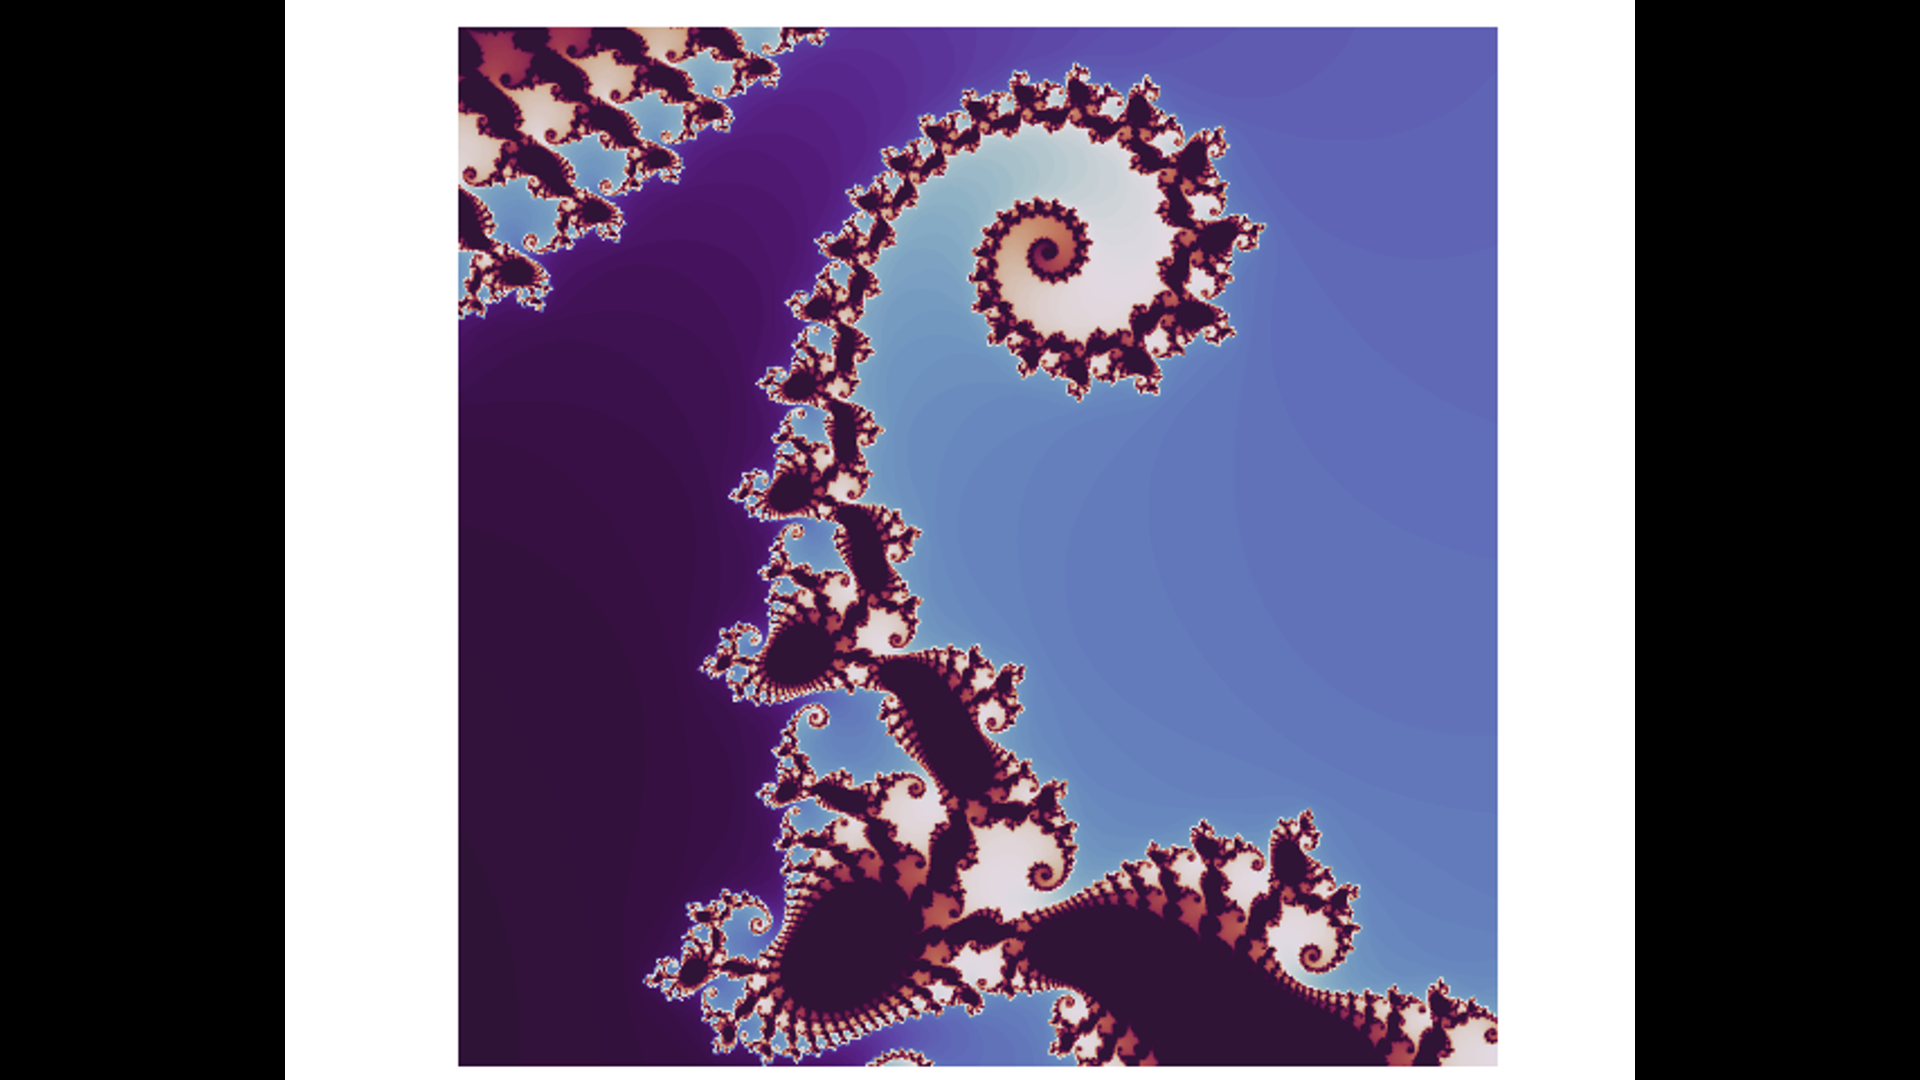

In [78]:
%%manim $ri
class Example(Scene):
    def construct(self):
        t=230
        fractal=ImageMobject(tranfer_mandelbrot(t=t))
        fractal.height=10
        self.add(fractal)

In [ ]:
%%manim $rv
class Example(Scene):
    def construct(self):
        t=ValueTracker(0)
        fractal = always_redraw( lambda :ImageMobject(tranfer_mandelbrot(int(np.ceil(t.get_value())))).set(height=10))
        self.add(fractal)
        self.play(t.animate.set_value(230),run_time=6)
        self.wait()

Manim Community v0.18.1

<span style="font-size:50px;">JUILA SET</span>

In [ ]:
c_values=[-0.29609091+0.62491j,-0.20509091+0.71591j,-0.744 + 0.148j,-0.29609091+0.62491j,-0.6583867-0.041100001j, -0.74797 -0.072500001j ]

In [ ]:
def julia_set0(h_range : int, w_range : int, max_iterations : int,c: complex):
	''' A function to determine the values of the Julia set. Takes
	an array size specified by h_range and w_range, in pixels, along
	with the number of maximum iterations to try.  Returns an array with 
	the number of the last bounded iteration at each array value.
	'''
	# top left to bottom right
	y, x = np.ogrid[1.4: -1.4: h_range*1j, -1.4: 1.4: w_range*1j]
	z_array = x + y*1j
	a = c
	iterations_til_divergence = max_iterations + np.zeros(z_array.shape)

	# create array of all True
	not_already_diverged = iterations_til_divergence < 10000

	# creat array of all False
	diverged_in_past = iterations_til_divergence > 10000


	for i in range(max_iterations):
		z_array = z_array**2 + a
		z_size_array = z_array * np.conj(z_array)
		diverging = z_size_array > 4
		diverging_now = diverging & not_already_diverged
		iterations_til_divergence[diverging_now] = i
		
		not_already_diverged = np.invert(diverging_now) & not_already_diverged

		# prevent overflow (values headed towards infinity) for diverging locations
		diverged_in_past = diverged_in_past | diverging_now
		z_array[diverged_in_past] = 0
	return iterations_til_divergence

In [ ]:
def tranfer_julia(c: complex):
        fig= plt.figure(figsize=(6,6))
        ax=plt.imshow(julia_set0(800, 800,  256, c), cmap='twilight_shifted', extent=[-1.4, 1.4, -1.4, 1.4])
        plt.axis('off')
        fig.canvas.draw()
        buf = fig.canvas.buffer_rgba()
        plt.close()
        return np.uint8(buf)

Manim Community v0.18.1

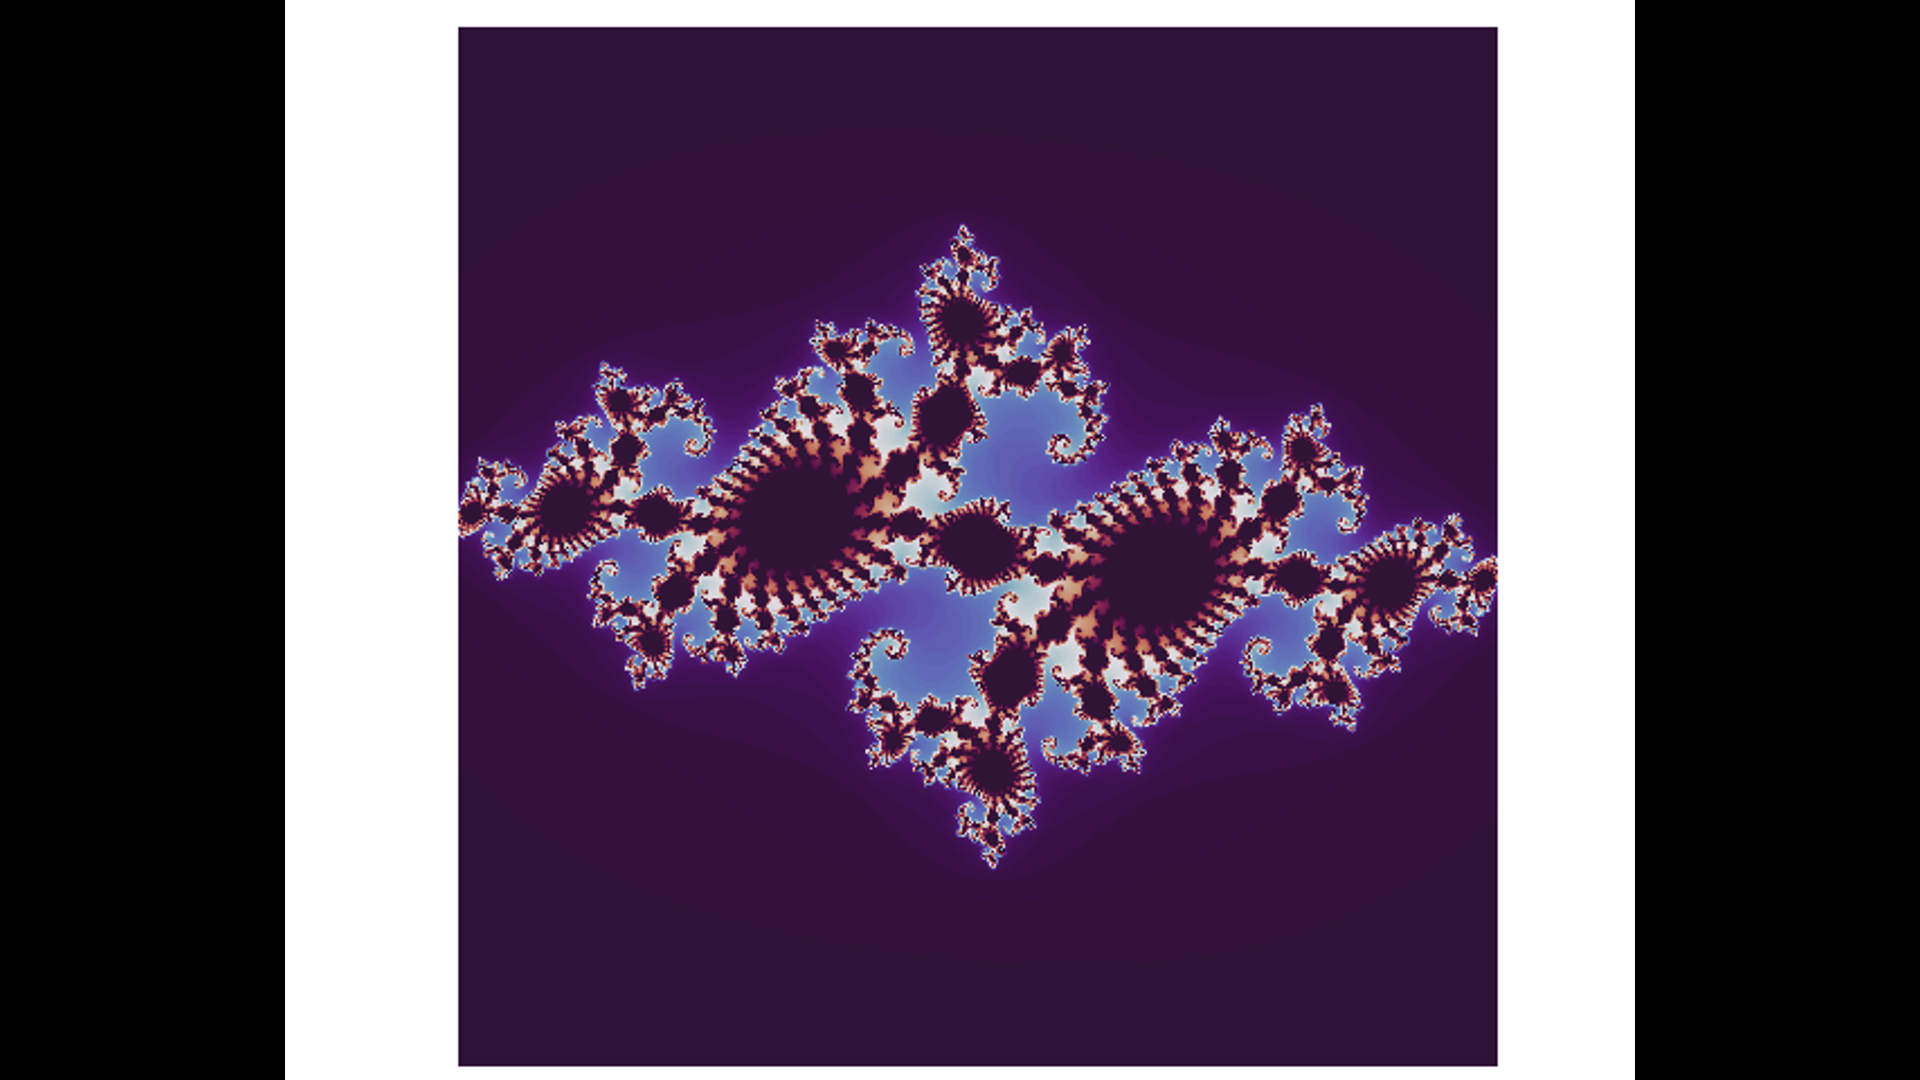

In [ ]:
%%manim $ri
class Example(Scene):
    def construct(self):
        fractal=ImageMobject(tranfer_julia(c=c_values[-4]))
        fractal.height=10
        self.add(fractal)
        

In [ ]:
%%manim $rv
class Example(Scene):
    def construct(self):
        vt=ComplexValueTracker(c_values[0])
        fractal = always_redraw(
            lambda : ImageMobject(tranfer_julia(c=vt.get_value())).set(height=10)
            )

        
        self.add(fractal)
        self.play(
        vt.animate.set_value( c_values[1]
            
        ),run_time=10)
        self.wait()

Manim Community v0.18.1

In [ ]:
def julia_set1(h_range, w_range, max_iterations, t):
	# top left to bottom right grid
	y, x = np.ogrid[1.4/(2**(t/15)) + 0.041100001: -1.4 / (2**(t/15)) + 0.041100001:h_range*1j, \
			-1.4/(2**(t/15)) -0.6583867: 1.4/(2**(t/15)) -0.6583867:w_range*1j]
	#                         x value to where          y value to where 
	#                           we zoom                 we zoom
	z_array = x + y*1j
	a = -0.29609091+0.62491j
 
	iterations_til_divergence = max_iterations + np.zeros(z_array.shape)

	# create array of all True
	not_already_diverged = iterations_til_divergence < 10000

	# creat array of all False
	diverged_in_past = iterations_til_divergence > 10000


	for i in range(max_iterations):
		z_array = z_array**2 + a
		z_size_array = z_array * np.conj(z_array)
		diverging = z_size_array > 4
		diverging_now = diverging & not_already_diverged
		iterations_til_divergence[diverging_now] = i
		
		not_already_diverged = np.invert(diverging_now) & not_already_diverged

		# prevent overflow (values headed towards infinity) for diverging locations
		diverged_in_past = diverged_in_past | diverging_now
		z_array[diverged_in_past] = 0
	return iterations_til_divergence

In [ ]:
def tranfer_julia(t):
        fig= plt.figure(figsize=(6,6))
        ax=plt.imshow(julia_set1(800, 800,  256 ,t), cmap='twilight_shifted', extent=[-1.4, 1.4, -1.4, 1.4],vmin=1, vmax=100)
        plt.axis('off')
        fig.canvas.draw()
        buf = fig.canvas.buffer_rgba()
        plt.close()
        return np.uint8(buf)

Manim Community v0.18.1

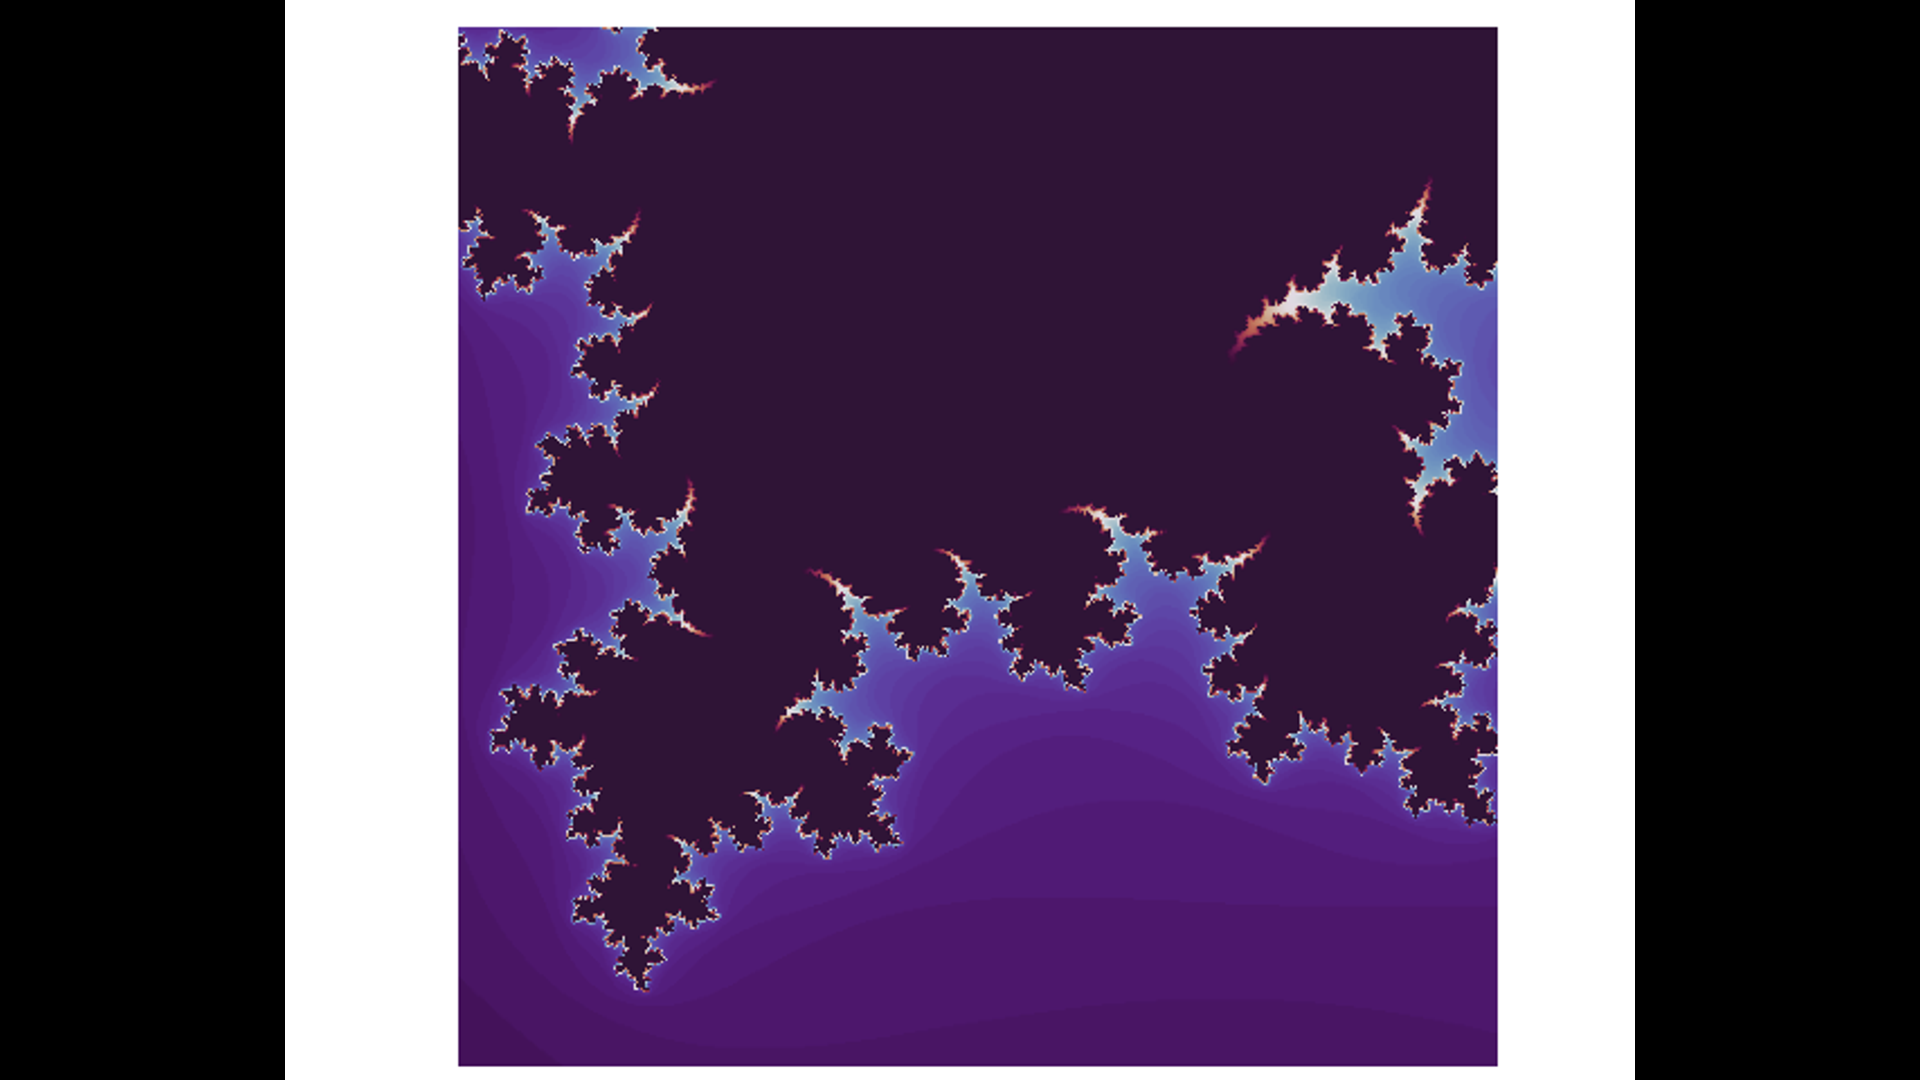

In [ ]:
%%manim $ri
class Example(Scene):
    def construct(self):
        t=ValueTracker(0)
        fractal = always_redraw( lambda : 
                                ImageMobject(tranfer_julia(int(np.ceil(t.get_value())))).set(height=10)
                                )
        
        
        self.add(fractal)
        self.play(t.animate.set_value(100),run_time=5)
        self.wait()